# 5주차 과제 1번째

#### 통계학과 201618968 김종원

In [1]:
import torch 
import matplotlib.pyplot as plt

In [2]:
X=torch.linspace(-1,1,2000).reshape(2000,1)
w0= - 1 
w1= 5 
u = w0+X*w1 
v = torch.exp(u)/(1+torch.exp(u)) # v=πi
y = torch.bernoulli(v) 

### 숙제 

loss를 mse로 바꿔서 돌려볼것 

In [3]:
torch.manual_seed(43052) 
l1=torch.nn.Linear(in_features=1,out_features=1,bias=True) 
a1=torch.nn.Sigmoid() 
net=torch.nn.Sequential(l1,a1) 
loss_fn = torch.nn.MSELoss() 
optimizer=torch.optim.SGD(net.parameters(),lr=0.05) 

In [4]:
for epoc in range(10000): 
    ## 1 
    yhat=net(X) 
    ## 2 
    loss=loss_fn(y,yhat)
    ## 3 
    loss.backward() 
    ## 4 
    optimizer.step() 
    net.zero_grad() 

In [5]:
list(net.parameters())

[Parameter containing:
 tensor([[4.4952]], requires_grad=True), Parameter containing:
 tensor([-0.9082], requires_grad=True)]

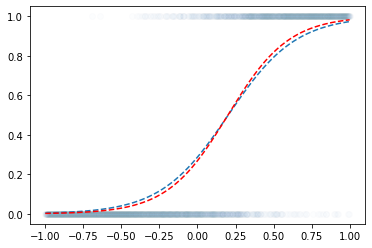

In [6]:
plt.scatter(X,y,alpha=0.01) 
plt.plot(X,net(X).data,'--') 
plt.plot(X,v,'--r')

기존 loss 함수를 사용했을 때보다 참값에서 멀어졌습니다.

기존 loss 사용 결과 : 4.9586, -0.9376

MSE loss 사용 결과 : 4.4952, -0.9082

참값 : 5, -1